# Sentiment analysis day-by-day (title)

In [1]:
# Import libraries
import pandas as pd

# Load the cleaned data
daily_title_data = pd.read_csv('../data/cleaned_wsb_title_withouttime.csv')

# Display data
daily_title_data

,title,timestamp,tickers
0,it not about the money it about sending message,2021-01-28,[]
1,math professor scott steiner says the numbers ...,2021-01-28,[]
2,exit the system,2021-01-28,[]
3,new sec filing for gme can someone less retard...,2021-01-28,"['GME', 'FOR']"
4,not to distract from gme just thought our amc ...,2021-01-28,"['GME', 'AMC']"
...,...,...,...
53181,what learned investigating sava fud spreaders,2021-08-02,[]
53182,daily popular tickers thread for august 02 202...,2021-08-02,"['GME', 'BABA']"
53183,hitler reacts to the market being irrational,2021-08-02,[]
53184,daily discussion thread for august 02 2021,2021-08-02,[]


In [2]:
# Convert body column to strings, replacing NaN with an empty string
daily_title_data['title'] = daily_title_data['title'].fillna('').astype(str)

# Convert 'timestamp' column to datetime
daily_title_data['timestamp'] = pd.to_datetime(daily_title_data['timestamp'])

# Extract the date
daily_title_data['date'] = daily_title_data['timestamp'].dt.date

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

In [3]:
# Import libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the analyzer
sia = SentimentIntensityAnalyzer()

# Get compound sentiment scores
daily_title_data['compound_score'] = daily_title_data['title'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Function to classify sentiment
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

daily_title_data['sentiment_category'] = daily_title_data['compound_score'].apply(classify_sentiment)

# Extract date for grouping
daily_title_data['date'] = daily_title_data['timestamp'].dt.date

# Count posts per day per sentiment category
daily_counts = daily_title_data.groupby(['date', 'sentiment_category']).size().unstack(fill_value=0).reset_index()


The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

positive sentiment : (compound score >= 0.05) 

neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 

negative sentiment : (compound score <= -0.05)

https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

In [4]:
# Display sentiment results
print(daily_counts)

sentiment_category        date  negative  neutral  positive
0                   2021-01-28       308      593       296
1                   2021-01-29      4069     7963      3662
2                   2021-01-30       336      609       479
3                   2021-01-31       242      395       302
4                   2021-02-01       204      382       298
..                         ...       ...      ...       ...
171                 2021-08-12        13       40        22
172                 2021-08-13        15       24        25
173                 2021-08-14         9       19         9
174                 2021-08-15         5       10         6
175                 2021-08-16         1        6         4

[176 rows x 4 columns]


C:\Users\sofie\AppData\Local\Temp\ipykernel_12396\4173416213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Count', data=sentiment_sums, palette=['red', 'grey', 'green'])


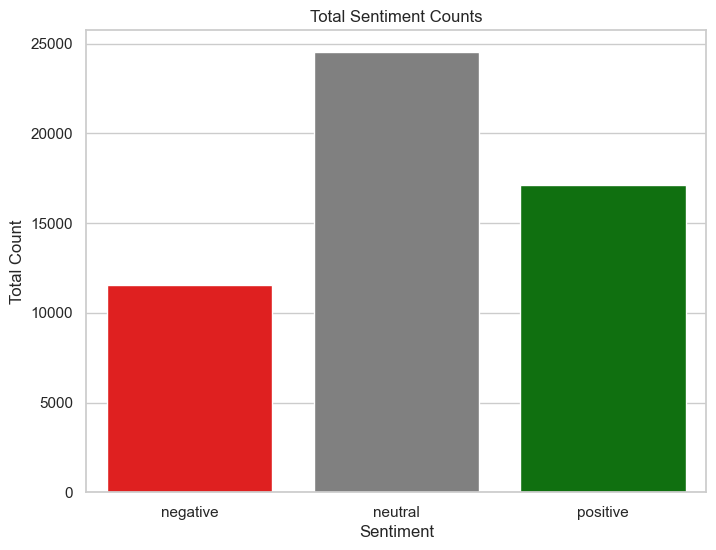

In [5]:
# Importing libriaries
import matplotlib.pyplot as plt
import seaborn as sns

# Sum up sentiments
sentiment_sums = daily_counts[['negative', 'neutral', 'positive']].sum()
sentiment_sums = sentiment_sums.reset_index()
sentiment_sums.columns = ['Sentiment', 'Count']

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x='Sentiment', y='Count', data=sentiment_sums, palette=['red', 'grey', 'green'])
plt.title('Total Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Total Count')
plt.show()

**Data for Performance Evaluation**

In [6]:
# Save the labeled sentiment data to a CSV for manual inspection
daily_title_data[['title', 'compound_score', 'sentiment_category']].to_csv('results/labeled_title_sentiments.csv', index=False)

# Plot sentiments over time period

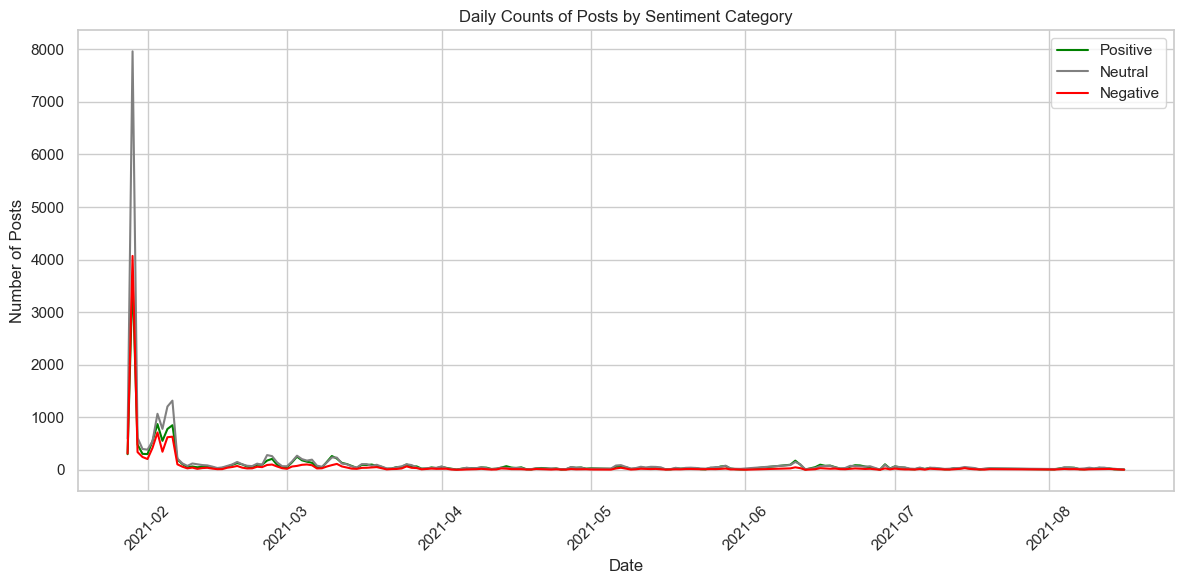

In [7]:
# Import libraries
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12,6))
plt.plot(daily_counts['date'], daily_counts['positive'], label='Positive', color='green')
plt.plot(daily_counts['date'], daily_counts['neutral'], label='Neutral', color='grey')
plt.plot(daily_counts['date'], daily_counts['negative'], label='Negative', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Daily Counts of Posts by Sentiment Category')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting GME stock prices

[*********************100%***********************]  1 of 1 completed


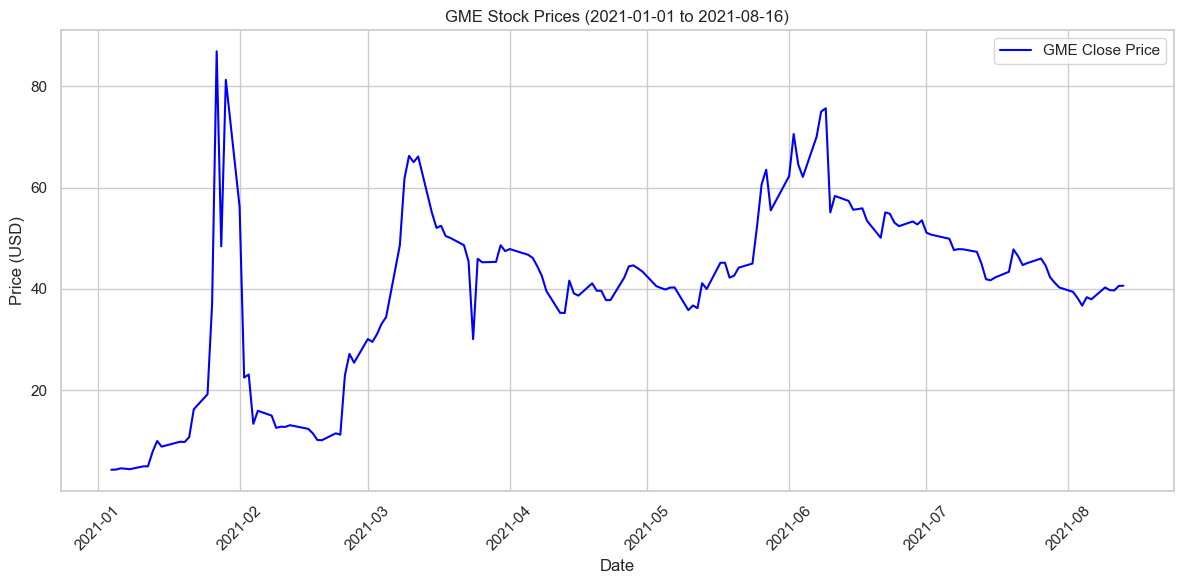

In [8]:
# Import libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Extract GME stock prices
gme = yf.download("GME", start="2021-01-01", end="2021-08-16")

# Plot
plt.figure(figsize=(12,6))
plt.plot(gme.index, gme['Close'], label='GME Close Price', color='blue')
plt.title("GME Stock Prices (2021-01-01 to 2021-08-16)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Putting it together

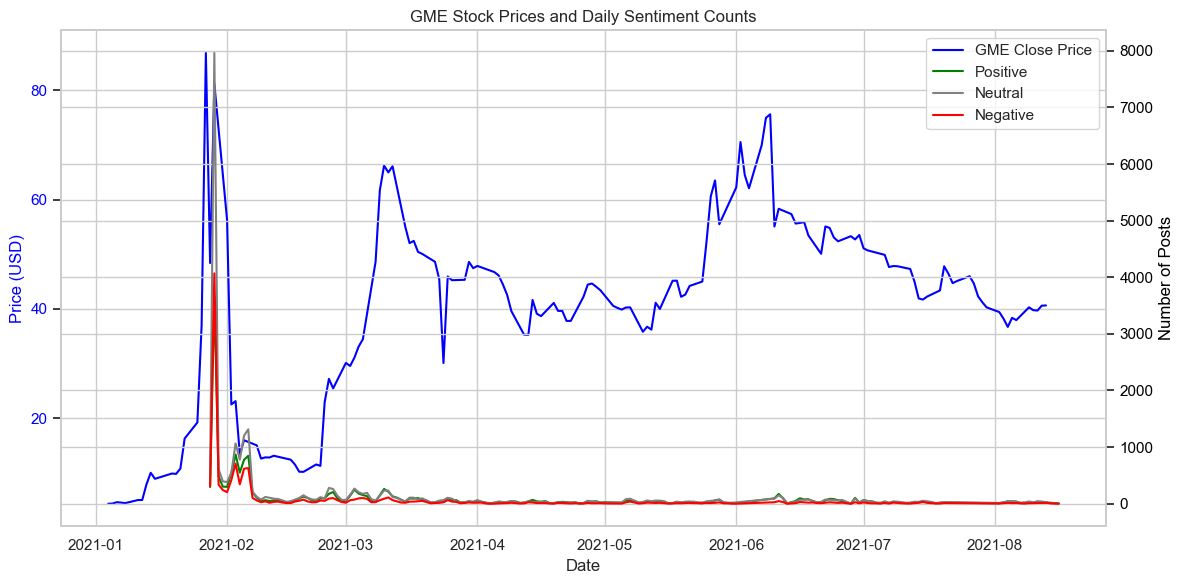

In [9]:
# Import libraries
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot GME stock price
ax1.plot(gme.index, gme['Close'], label='GME Close Price', color='blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("GME Stock Prices and Daily Sentiment Counts")

# Create a twin of the first axis to host the sentiment counts
ax2 = ax1.twinx()

# Plot sentiment lines
ax2.plot(daily_counts['date'], daily_counts['positive'], label='Positive', color='green')
ax2.plot(daily_counts['date'], daily_counts['neutral'], label='Neutral', color='grey')
ax2.plot(daily_counts['date'], daily_counts['negative'], label='Negative', color='red')

ax2.set_ylabel("Number of Posts", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Looking at the sentiments on the days with most activity

In [10]:
# Print the top 30 days with most posts
daily_counts['total_posts'] = daily_counts['positive'] + daily_counts['neutral'] + daily_counts['negative']

top_30_days = daily_counts.sort_values('total_posts', ascending=False).head(30)
print(top_30_days)

sentiment_category        date  negative  neutral  positive  total_posts
1                   2021-01-29      4069     7963      3662        15694
9                   2021-02-06       629     1315       847         2791
6                   2021-02-03       709     1065       869         2643
8                   2021-02-05       619     1203       776         2598
7                   2021-02-04       343      778       550         1671
5                   2021-02-02       415      542       545         1502
2                   2021-01-30       336      609       479         1424
0                   2021-01-28       308      593       296         1197
3                   2021-01-31       242      395       302          939
4                   2021-02-01       204      382       298          884
34                  2021-03-03        73      267       249          589
41                  2021-03-10        88      234       261          583
29                  2021-02-26        99      259  

In [11]:
# Import libraries
import pandas as pd

# Load the cleaned data
time_title_data = pd.read_csv('../data/cleaned_wsb_title_withtime.csv')

# Convert the 'timestamp' column to datetime format
time_title_data['timestamp'] = pd.to_datetime(time_title_data['timestamp'])

# Filter for rows on 2021-01-29
filtered_data = time_title_data[time_title_data['timestamp'].dt.date == pd.to_datetime('2021-01-29').date()]

In [12]:
# Import libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the analyzer
sia = SentimentIntensityAnalyzer()

# Get compound sentiment scores
filtered_data['compound_score'] = filtered_data['title'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Function to classify sentiment
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

filtered_data['sentiment_category'] = filtered_data['compound_score'].apply(classify_sentiment)


C:\Users\sofie\AppData\Local\Temp\ipykernel_12396\2357218773.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['compound_score'] = filtered_data['title'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
C:\Users\sofie\AppData\Local\Temp\ipykernel_12396\2357218773.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment_category'] = filtered_data['compound_score'].apply(classify_sentiment)


In [13]:
# Display results
print(filtered_data)

                                                   title           timestamp  \
1197                 current data on gme short positions 2021-01-29 01:02:55   
1198                                                 zom 2021-01-29 01:02:50   
1199                                                xspa 2021-01-29 01:02:37   
1200                                   do not forget nok 2021-01-29 01:02:24   
1201                                        hold your bb 2021-01-29 01:02:24   
...                                                  ...                 ...   
17514  this is it we re sharpening our blades the tim... 2021-01-29 23:38:02   
17515               someone there have hope to buy for 1 2021-01-29 23:37:36   
17516          you guys are winning this game keep it up 2021-01-29 23:37:20   
17517             we did it they re hurting keep holding 2021-01-29 23:36:46   
17518  amc only up from here just valuation and not t... 2021-01-29 23:36:43   

       tickers  compound_score sentimen

# Plot sentiments on given day (2021-01-29) hour-by-hour

C:\Users\sofie\AppData\Local\Temp\ipykernel_12396\1976231803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['timestamp'].dt.hour


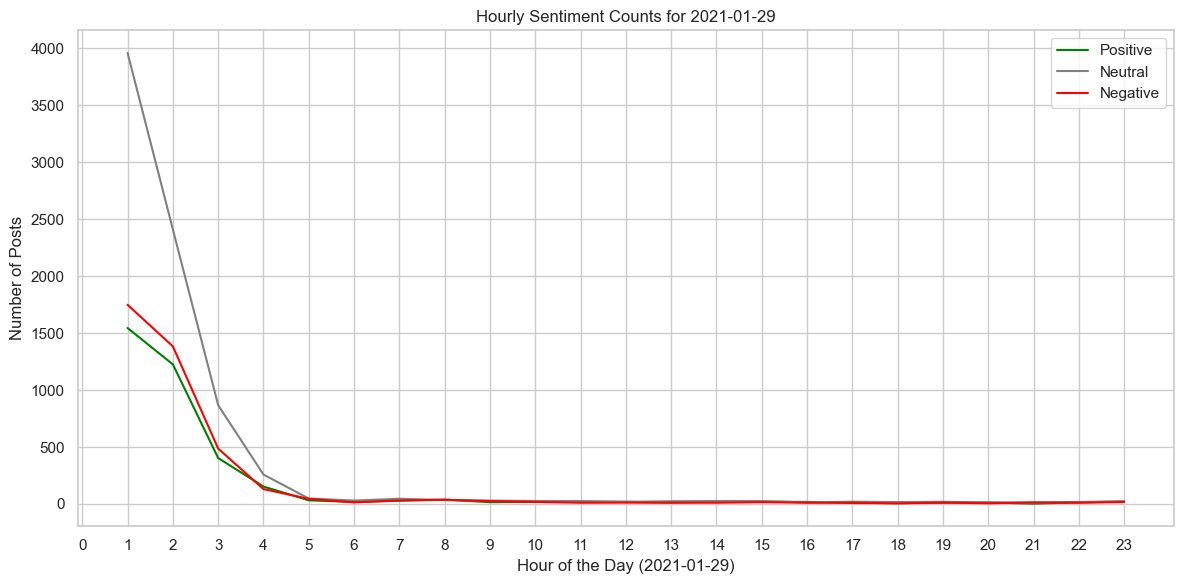

In [14]:
# Import libraries
import matplotlib.pyplot as plt

# Extract the hour from the timestamp
filtered_data['hour'] = filtered_data['timestamp'].dt.hour

# Count the number of posts per hour per sentiment category
hourly_counts = filtered_data.groupby(['hour', 'sentiment_category']).size().unstack(fill_value=0).reset_index()

# Plotting
plt.figure(figsize=(12,6))
plt.plot(hourly_counts['hour'], hourly_counts['positive'], label='Positive', color='green')
plt.plot(hourly_counts['hour'], hourly_counts['neutral'], label='Neutral', color='grey')
plt.plot(hourly_counts['hour'], hourly_counts['negative'], label='Negative', color='red')

plt.xlabel('Hour of the Day (2021-01-29)')
plt.ylabel('Number of Posts')
plt.title('Hourly Sentiment Counts for 2021-01-29')
plt.legend()
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


Unfortunately I couldn't look up the stock prices hour by hour with yfinance as this can only be seen from the last 730 days